<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Что такое Colaboratory?</h1>

Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:
- не требуется никакой настройки;
- вы получаете бесплатный доступ к графическим процессорам;
- предоставлять доступ к документам другим людям очень просто.

Это отличное решение для <strong>студентов</strong>, <strong>специалистов по обработке данных</strong> и <strong>исследователей в области искусственного интеллекта</strong>. Чтобы узнать больше, посмотрите <a href="https://www.youtube.com/watch?v=inN8seMm7UI">ознакомительное видео</a> или начните работу с инструментом ниже.

## <strong>Начало работы</strong>

Документ, который вы читаете, размещен не на статической веб-странице, а в интерактивной среде под названием <strong>блокнот Colab</strong>, позволяющей писать и выполнять код.

Например, вот <strong>ячейка</strong> с коротким скриптом Python, который позволяет рассчитать значение, выразить его в виде переменной и распечатать результат:

In [ ]:
import numpy as np

def griddata(x, y, z, binsize=0.01, retbin=True, retloc=True):
    """
    Place unevenly spaced 2D data on a grid by 2D binning (nearest
    neighbor interpolation).
    
    Parameters
    ----------
    x : ndarray (1D)
        The idependent data x-axis of the grid.
    y : ndarray (1D)
        The idependent data y-axis of the grid.
    z : ndarray (1D)
        The dependent data in the form z = f(x,y).
    binsize : scalar, optional
        The full width and height of each bin on the grid.  If each
        bin is a cube, then this is the x and y dimension.  This is
        the step in both directions, x and y. Defaults to 0.01.
    retbin : boolean, optional
        Function returns `bins` variable (see below for description)
        if set to True.  Defaults to True.
    retloc : boolean, optional
        Function returns `wherebins` variable (see below for description)
        if set to True.  Defaults to True.
   
    Returns
    -------
    grid : ndarray (2D)
        The evenly gridded data.  The value of each cell is the median
        value of the contents of the bin.
    bins : ndarray (2D)
        A grid the same shape as `grid`, except the value of each cell
        is the number of points in that bin.  Returns only if
        `retbin` is set to True.
    wherebin : list (2D)
        A 2D list the same shape as `grid` and `bins` where each cell
        contains the indicies of `z` which contain the values stored
        in the particular bin.

    Revisions
    ---------
    2010-07-11  ccampo  Initial version
    """
    # get extrema values.
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    # make coordinate arrays.
    xi      = np.arange(xmin, xmax+binsize, binsize)
    yi      = np.arange(ymin, ymax+binsize, binsize)
    xi, yi = np.meshgrid(xi,yi)

    # make the grid.
    grid           = np.zeros(xi.shape, dtype=x.dtype)
    nrow, ncol = grid.shape
    if retbin: bins = np.copy(grid)

    # create list in same shape as grid to store indices
    if retloc:
        wherebin = np.copy(grid)
        wherebin = wherebin.tolist()

    # fill in the grid.
    for row in range(nrow):
        for col in range(ncol):
            xc = xi[row, col]    # x coordinate.
            yc = yi[row, col]    # y coordinate.

            # find the position that xc and yc correspond to.
            posx = np.abs(x - xc)
            posy = np.abs(y - yc)
            ibin = np.logical_and(posx < binsize/2., posy < binsize/2.)
            ind  = np.where(ibin == True)[0]

            # fill the bin.
            bin = z[ibin]
            if retloc: wherebin[row][col] = ind
            if retbin: bins[row, col] = bin.size
            if bin.size != 0:
                binval         = np.median(bin)
                grid[row, col] = binval
            else:
                grid[row, col] = np.nan   # fill empty bins with nans.

    # return the grid
    if retbin:
        if retloc:
            return grid, bins, wherebin
        else:
            return grid, bins
    else:
        if retloc:
            return grid, wherebin
        else:
            return grid

            X      Y       Z
0      39.370  30.21  0.5163
1      80.590  51.49  0.5124
2      67.750  89.27  0.4941
3       1.315  64.52  0.4200
4      71.430  49.97  0.4974
...       ...    ...     ...
12416  24.970  12.82  0.4673
12417  85.370  14.41  0.4200
12418  27.810  99.99  0.4979
12419  48.480  26.08  0.5126
12420  44.090  81.92  0.5024

[12421 rows x 3 columns]
[[   0    1    2 ... 7373 7374 7375]
 [   0    1    2 ... 7373 7374 7375]
 [   0    1    2 ... 7373 7374 7375]
 ...
 [   0    1    2 ... 7373 7374 7375]
 [   0    1    2 ... 7373 7374 7375]
 [   0    1    2 ... 7373 7374 7375]]
[[0.42       0.42       0.42       ... 0.42       0.42       0.42      ]
 [0.42007773 0.42000107 0.42       ... 0.42       0.42       0.42      ]
 [0.42015545 0.42005761 0.42000213 ... 0.42       0.42       0.42      ]
 ...
 [0.42       0.42011032 0.42028607 ... 0.48610367 0.48610167 0.48609846]
 [0.42       0.42014304 0.42027866 ... 0.48610207 0.48610183 0.48609923]
 [0.42       0.42017915 0.42

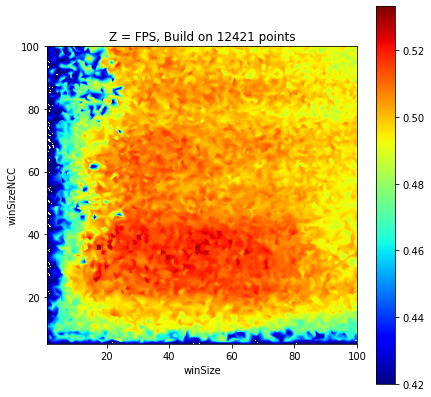

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy import interpolate
import pandas as pd

my_data = genfromtxt('baesion_res1.txt', delimiter=',')
my_data1 = genfromtxt('baesion_res.txt', delimiter=',')
my_data2 = genfromtxt('baesion_res2.txt', delimiter=',')
my_data3 = genfromtxt('baesion_res3.txt', delimiter=',')
X1 = my_data1[:,1]
Y1 = my_data1[:,2]
Z1 = my_data1[:,3]
X2 = my_data2[:,1]
Y2 = my_data2[:,2]
Z2 = my_data2[:,3]
# my_data1 = genfromtxt('baesion_res1.txt', delimiter=',')
# print(my_data)

# Setting up input values
# my_data = np.delete(my_data, 8, 0)
n = -1
X3 = my_data3[:,2]
Y3 = my_data3[:,3]
Z3 = my_data3[:,1]
# X = X3
# Y = Y3
# Z = Z3
X = my_data[:,2]
Y = my_data[:,3]
Z = my_data[:,1]
X = np.append(X, X1, 0)
Y = np.append(Y, Y1, 0)
Z = np.append(Z, Z1, 0)
X = np.append(X, X2, 0)
Y = np.append(Y, Y2, 0)
Z = np.append(Z, Z2, 0)
X = np.append(X, X3, 0)
Y = np.append(Y, Y3, 0)
Z = np.append(Z, Z3, 0)
X = X[:n]
Y = Y[:n]
Z = Z[:n]
# for i in range(len(X)):
#   if X[i] > 100:
#     print("a")
for i in range(len(Z)):
  if Z[i] <= 0.42:
    Z[i] = 0.42
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
print(data)
# data.append(pd.DataFrame({'X': X, 'Y': Y, 'Z': Z}), ignore_index = True) 
data = data.sort_values('Z').drop_duplicates(['X', 'Y'], keep='last')

data_pivoted = data.pivot("X", "Y", "Z")
# print(data_pivoted)
data_pivoted = data_pivoted.to_numpy()
x = np.arange(0, data_pivoted.shape[1])
y = np.arange(0, data_pivoted.shape[0])
#mask invalid values
array = np.ma.masked_invalid(data_pivoted)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
print(xx)
GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy), method='linear', fill_value=0.42)
# linear, nearest, cubic
# GD1 = interpolate.NearestNDInterpolator((x1, y1), newarr.ravel())
# GD1 = GD1(xx, yy)
# tck = interpolate.bisplrep(x1, y1, newarr.ravel(), s=0, kx=xx, ky=yy)
# GD1 = interpolate.bisplev(x1, yx, tck)
print(GD1)
data_pivoted = pd.DataFrame(data=GD1)
npr = np.random
npts = len(Z)                            # the total number of data points.
x = X           # create some normally distributed dependent data in x.
y = Y          # ... do the same for y.
z= Z                  # z = f(x, y) = x**2 + y**2

# plot some profiles / cross-sections for some visualization.  our
# function is a symmetric, upward opening paraboloid z = x**2 + y**2.
# We expect it to be symmetric about and and y, attain a minimum on
# the origin and display minor Gaussian noise.

# plt.ion()   # pyplot interactive mode on

# x vs z cross-section.  notice the noise.
# plt.plot(x, z, '.')
# plt.title('X vs Z=F(X,Y=constant)')
# plt.xlabel('X')
# plt.ylabel('Z')

# # y vs z cross-section.  notice the noise.
# plt.plot(y, z, '.')
# plt.title('Y vs Z=F(Y,X=constant)')
# plt.xlabel('Y')
# plt.ylabel('Z')

# # now show the dependent data (x vs y).  we could represent the z data
# # as a third axis by either a 3d plot or contour plot, but we need to
# # grid it first....
# plt.plot(x, y, '.')
# plt.title('X vs Y')
# plt.xlabel('X')
# plt.ylabel('Y')

# enter the gridding.  imagine drawing a symmetrical grid over the
# plot above.  the binsize is the width and height of one of the grid
# cells, or bins in units of x and y.
binsize = 3
# grid, bins, binloc = griddata(x, y, z, binsize=binsize)  # see this routine's docstring


# minimum values for colorbar. filter our nans which are in the grid
# zmin    = grid[np.where(np.isnan(grid) == False)].min()
# zmax    = grid[np.where(np.isnan(grid) == False)].max()

# colorbar stuff
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.subplots(figsize=(500*px, 500*px))
palette = plt.matplotlib.colors.LinearSegmentedColormap('jet3',plt.cm.datad['jet'],4096)
palette.set_under(alpha=0.0)

# plot the results.  first plot is x, y vs z, where z is a filled level plot.
extent = (X.min(), X.max(), Y.min(), Y.max()) # extent of the plot
# plt.subplot(1, 1, 1)
# plt.set_figheight(15)
# 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.imshow(data_pivoted, extent=extent, cmap=palette, origin='lower', vmin=Z.min(), vmax=Z.max(), interpolation='nearest')
plt.xlabel('winSize')
plt.ylabel('winSizeNCC')
plt.title(f'Z = FPS, Build on {npts} points')
plt.colorbar()
plt.show()
# now show the number of points in each bin.  since the independent data are
# Gaussian distributed, we expect a 2D Gaussian.
# plt.subplot(1, 2, 2)
# plt.imshow(bins, extent=extent, cmap=palette, origin='lower', vmin=0, vmax=bins.max(), aspect='auto', interpolation='bilinear')
# plt.xlabel('X values')
# plt.ylabel('Y values')
# plt.title('X, Y vs The No. of Pts Per Bin')
# plt.colorbar()

           X      Y       Z
0     39.370  30.21  0.5163
1     80.590  51.49  0.5124
2     67.750  89.27  0.4941
3      1.315  64.52  0.4200
4     71.430  49.97  0.4974
...      ...    ...     ...
5495  31.990  25.38  0.5332
5496  24.890  58.82  0.5124
5497  22.340  99.97  0.5014
5498  74.450  91.93  0.4893
5499  42.510  56.59  0.4995

[5500 rows x 3 columns]
[[   0    1    2 ... 4412 4413 4414]
 [   0    1    2 ... 4412 4413 4414]
 [   0    1    2 ... 4412 4413 4414]
 ...
 [   0    1    2 ... 4412 4413 4414]
 [   0    1    2 ... 4412 4413 4414]
 [   0    1    2 ... 4412 4413 4414]]
[[0.42       0.42       0.42       ... 0.42       0.42       0.42      ]
 [0.4202     0.42       0.42       ... 0.42       0.42008868 0.42028632]
 [0.4204     0.42012739 0.42       ... 0.42017735 0.42029559 0.42057264]
 ...
 [0.42       0.42023325 0.42050213 ... 0.48616176 0.48653535 0.48609722]
 [0.42       0.42025106 0.42031304 ... 0.48609426 0.48613088 0.48609861]
 [0.42       0.42039799 0.42079597 ... 0.

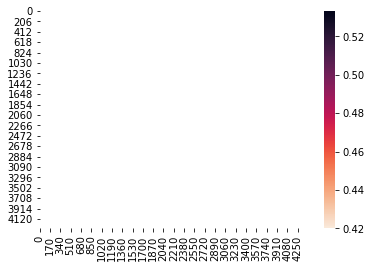

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from scipy import interpolate

my_data = genfromtxt('baesion_res1.txt', delimiter=',')
my_data1 = genfromtxt('baesion_res.txt', delimiter=',')
my_data2 = genfromtxt('baesion_res2.txt', delimiter=',')
my_data3 = genfromtxt('baesion_res3.txt', delimiter=',')
X1 = my_data1[:,1]
Y1 = my_data1[:,2]
Z1 = my_data1[:,3]
X2 = my_data2[:,1]
Y2 = my_data2[:,2]
Z2 = my_data2[:,3]
# my_data1 = genfromtxt('baesion_res1.txt', delimiter=',')
# print(my_data)

# Setting up input values
# my_data = np.delete(my_data, 8, 0)
n = 5500
X3 = my_data3[:,2]
Y3 = my_data3[:,3]
Z3 = my_data3[:,1]
# X = X3
# Y = Y3
# Z = Z3
X = my_data[:,2]
Y = my_data[:,3]
Z = my_data[:,1]
X = np.append(X, X1, 0)
Y = np.append(Y, Y1, 0)
Z = np.append(Z, Z1, 0)
X = np.append(X, X2, 0)
Y = np.append(Y, Y2, 0)
Z = np.append(Z, Z2, 0)
X = np.append(X, X3, 0)
Y = np.append(Y, Y3, 0)
Z = np.append(Z, Z3, 0)
X = X[:n]
Y = Y[:n]
Z = Z[:n]
# for i in range(len(X)):
#   if X[i] > 100:
#     print("a")
for i in range(len(Z)):
  if Z[i] <= 0.42:
    Z[i] = 0.42
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
print(data)
# data.append(pd.DataFrame({'X': X, 'Y': Y, 'Z': Z}), ignore_index = True) 
data = data.sort_values('Z').drop_duplicates(['X', 'Y'], keep='last')

data_pivoted = data.pivot("X", "Y", "Z")
# print(data_pivoted)
data_pivoted = data_pivoted.to_numpy()
x = np.arange(0, data_pivoted.shape[1])
y = np.arange(0, data_pivoted.shape[0])
#mask invalid values
array = np.ma.masked_invalid(data_pivoted)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
print(xx)
GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy), method='linear', fill_value=0.42)
# GD1 = interpolate.NearestNDInterpolator((x1, y1), newarr.ravel())
# GD1 = GD1(xx, yy)
# tck = interpolate.bisplrep(x1, y1, newarr.ravel(), s=0, kx=xx, ky=yy)
# GD1 = interpolate.bisplev(x1, yx, tck)
print(GD1)
data_pivoted = pd.DataFrame(data=GD1)
ax = sns.heatmap(data_pivoted,cmap=sns.color_palette("rocket_r", as_cmap=True))
plt.show()

Чтобы выполнить код в ячейке выше, выберите ее, а затем нажмите кнопку воспроизведения слева от кода или используйте сочетание клавиш Cmd/Ctrl + Ввод. Чтобы изменить код, достаточно нажать на ячейку.

Переменные, заданные в одной ячейке, можно будет использовать в других ячейках:

[[-1.                 nan         nan ...         nan         nan
          nan]
 [-0.99651418 -0.96687587 -0.9713521  ...         nan         nan
          nan]
 [-0.99302836 -0.93955389 -0.93375174 ...         nan         nan
          nan]
 ...
 [        nan         nan         nan ...  0.48624042  0.48640093
   0.48621917]
 [        nan         nan         nan ...  0.48622342  0.48617021
   0.48615959]
 [        nan         nan         nan ...  0.48611287  0.48610643
   0.4861    ]]


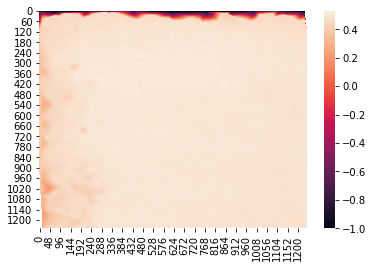

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from scipy import interpolate

my_data = genfromtxt('baesion_res1.txt', delimiter=',')
# my_data1 = genfromtxt('baesion_res1.txt', delimiter=',')
# print(my_data)

# Setting up input values
# my_data = np.delete(my_data, 8, 0)
X = my_data[:,2]
Y = my_data[:,3]
Z = my_data[:,1]
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
my_data = genfromtxt('baesion_res.txt', delimiter=',')
X = my_data[:,1]
Y = my_data[:,2]
Z = my_data[:,3]
data.append(pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})) 
my_data = genfromtxt('baesion_res2.txt', delimiter=',')
# my_data1 = genfromtxt('baesion_res1.txt', delimiter=',')
# print(my_data)

# Setting up input values
# my_data = np.delete(my_data, 8, 0)
X = my_data[:,2]
Y = my_data[:,1]
Z = my_data[:,3]
data.append(pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})) 
# data = data.reset_index().drop_duplicates(subset='index', keep='last').set_index('index').sort_index()

data_pivoted = data.pivot("X", "Y", "Z")
# print(data_pivoted)
data_pivoted = data_pivoted.to_numpy()
x = np.arange(0, data_pivoted.shape[1])
y = np.arange(0, data_pivoted.shape[0])
#mask invalid values
array = np.ma.masked_invalid(data_pivoted)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy), method='linear')
print(GD1)
data_pivoted = pd.DataFrame(data=GD1)
# data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

Благодаря блокнотам Colab вы можете использовать в одном документе <strong>исполняемый код</strong>, <strong>форматированный текст</strong>, <strong>изображения</strong>, <strong>разметку HTML</strong>, <strong>набор LaTeX</strong> и не только. Блокноты Colab будут храниться на вашем Google Диске. Вы сможете открыть к ним доступ коллегам или друзьям, разрешив им просматривать или даже редактировать документ, а также оставлять комментарии. Подробная информация доступна на <a href="/notebooks/basic_features_overview.ipynb">этой странице</a>. Чтобы создать блокнот Colab, можно воспользоваться меню "Файл" выше или <a href="http://colab.research.google.com#create=true">перейти по этой ссылке</a>.

Блокноты Colab – это блокноты Jupyter, которые размещены в сервисе Colab. Подробная информация о проекте Jupyter доступна на сайте <a href="https://www.jupyter.org">jupyter.org</a>.

## Анализ и обработка данных

Colab позволяет использовать для анализа и визуализации данных все возможности популярных библиотек Python. Например, в ячейке ниже используется библиотека <strong>numpy</strong> для генерации случайных данных, а также библиотека <strong>matplotlib</strong> для их визуализации. Чтобы изменить код, достаточно нажать на ячейку.

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


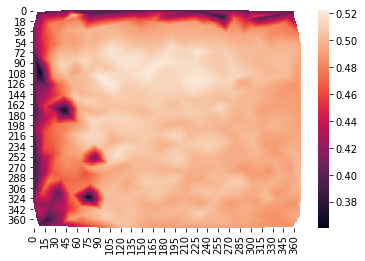

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from scipy import interpolate

my_data = genfromtxt('baesion_res1.txt', delimiter=',')
# my_data1 = genfromtxt('baesion_res1.txt', delimiter=',')
# print(my_data)

# Setting up input values
# my_data = np.delete(my_data, 8, 0)
X = my_data[:,2]
Y = my_data[:,3]
Z = my_data[:,1]
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
my_data = genfromtxt('baesion_res.txt', delimiter=',')
X = my_data[:,1]
Y = my_data[:,2]
Z = my_data[:,3]
data.append(pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})) 
# data = data.reset_index().drop_duplicates(subset='index', keep='last').set_index('index').sort_index()

data_pivoted = data.pivot("X", "Y", "Z")
# print(data_pivoted)
data_pivoted = data_pivoted.to_numpy()
x = np.arange(0, data_pivoted.shape[1])
y = np.arange(0, data_pivoted.shape[0])
#mask invalid values
array = np.ma.masked_invalid(data_pivoted)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy), method='linear')
print(GD1)
data_pivoted = pd.DataFrame(data=GD1)
ax = sns.heatmap(data_pivoted)
plt.show()

Вы можете импортировать в блокноты Colab данные из своего аккаунта Google Диска, в том числе из таблиц, а также из GitHub и многих других источников. Чтобы узнать больше об импорте данных и о том, как можно использовать Colab для их анализа и обработки, изучите ссылки в разделе <a href="#working-with-data">Работа с данными</a>.

## Машинное обучение

В Colab вы можете импортировать набор данных изображения, сориентировать на него классификатор изображений и оценить модель с помощью <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">нескольких строк кода</a>. Код в блокнотах Colab исполняется на облачных серверах Google. Это означает, что вы можете использовать аппаратное обеспечение Google, <a href="#using-accelerated-hardware">в том числе графические процессоры и TPU</a>, независимо от мощности вашей машины. Вам нужен только браузер.

Colab активно используется в области машинного обучения, в том числе для:
- знакомства с TensorFlow;
- разработки и обучения нейронных сетей;
- экспериментов с TPU;
- распространения исследований в области ИИ;
- создания руководств.

Примеры использования блокнотов Colab в сфере машинного обучения приведены в разделе <a href="#machine-learning-examples">Примеры использования в машинном обучении</a> ниже.

## Ресурсы по теме

### Работа с блокнотами в Colab
- [Общие сведения о Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Руководство для Markdown](/notebooks/markdown_guide.ipynb)
- [Импорт библиотек и установка зависимостей](/notebooks/snippets/importing_libraries.ipynb)
- [Сохранение и загрузка блокнотов в GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Интерактивные формы](/notebooks/forms.ipynb)
- [Интерактивные виджеты](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 в Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Работа с данными
- [Загрузка данных: Диск, Таблицы и Google Cloud Storage](/notebooks/io.ipynb) 
- [Диаграмма: визуализация данных](/notebooks/charts.ipynb)
- [Начало работы с BigQuery](/notebooks/bigquery.ipynb)

### Экспресс-курс по машинному обучению
Вот несколько блокнотов из онлайн-курса по машинному обучению от Google. Ещё больше информации доступно на <a href="https://developers.google.com/machine-learning/crash-course/">сайте курса</a>.
- [Введение в pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Концепции TensorFlow](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [Начало работы с TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Введение в нейросети](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Введение в разреженные данные и встраивания](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Использование ускорителей
- [TensorFlow с графическими процессорами](/notebooks/gpu.ipynb)
- [TensorFlow с TPU](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Примеры использования в машинном обучении

Подробные примеры интерактивного анализа, выполняемого с помощью машинного обучения и доступного благодаря платформе Colaboratory, можно найти в этих руководствах. В них используются модели с сайта <a href="https://tfhub.dev">TensorFlow Hub</a>.

Несколько примеров:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Обучение классификатора изображений</a>. Используя предварительно обученный классификатор изображений, создайте модель Keras для распознавания цветов.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Классификация текста</a>. Разделите отзывы на сайте IMDb на <em>положительные</em> и <em>отрицательные</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Перенос стиля</a>. Используйте модель глубокого обучения, чтобы переносить стиль с одного изображения на другое.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Вопросно-ответный универсальный многоязычный кодировщик</a>. Используйте модель машинного обучения, чтобы отвечать на вопросы из набора данных SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Интерполяция видео.</a> Спрогнозируйте, что произошло между первым и последним кадрами видео.
